# Tutorial de Big Data
## Tutorial 7

**Objetivo:**
Que se familiaricen con métodos no paramétricos

### Métodos no paramétricos
El objetivo es predecir distribución de una variable de interés 
- 𝑌 variable de interés
- 𝑓(𝑌) distribución de 𝑌

Métodos
- Histogramas
- Kernels


#### Histogramas


Podemos usar hist de Matplotlib. Ver documentación [acá](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generamos datos
np.random.seed(20)
X = np.concatenate([np.random.normal(0,1,500), np.random.normal(5,1,500)]).reshape(-1,1)
X

array([[ 8.83893113e-01],
       [ 1.95865022e-01],
       [ 3.57536516e-01],
       [-2.34326191e+00],
       [-1.08483259e+00],
       [ 5.59696289e-01],
       [ 9.39469350e-01],
       [-9.78481042e-01],
       [ 5.03096840e-01],
       [ 4.06414469e-01],
       [ 3.23461010e-01],
       [-4.93410882e-01],
       [-7.92016791e-01],
       [-8.42367934e-01],
       [-1.27950266e+00],
       [ 2.45715170e-01],
       [-4.41948007e-02],
       [ 1.56763255e+00],
       [ 1.05110868e+00],
       [ 4.06368426e-01],
       [-1.68646101e-01],
       [-3.18970279e+00],
       [ 1.12013226e+00],
       [ 1.33277821e+00],
       [-2.43338766e-01],
       [-1.30030711e-01],
       [-1.09017371e-01],
       [ 1.55618644e+00],
       [ 1.28778353e-01],
       [-2.06694872e+00],
       [-8.85493155e-01],
       [-1.10457948e+00],
       [ 9.32866347e-01],
       [ 2.05983800e+00],
       [-9.34937958e-01],
       [-1.61299022e+00],
       [ 5.27069718e-01],
       [-1.55110074e+00],
       [ 3.2

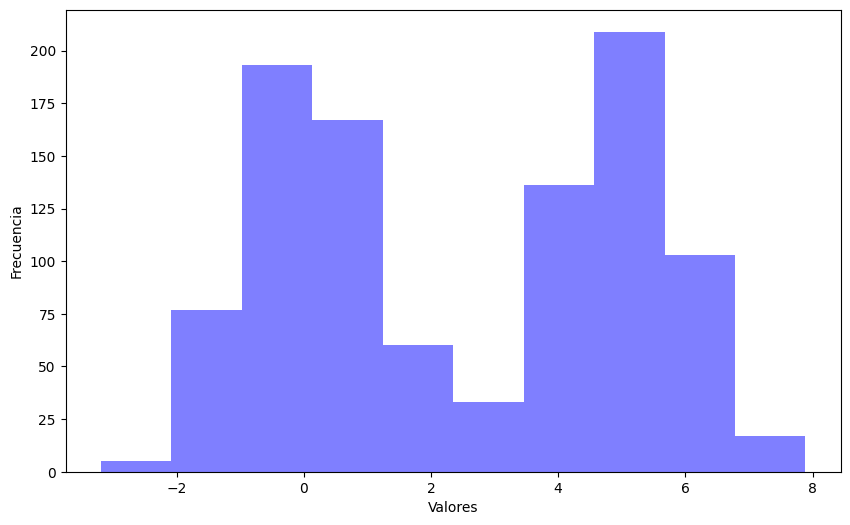

In [3]:
# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, alpha=0.5, color='blue') # por default, 10 bins
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

A menor número de bins (particiones), más observaciones se acumulan en cada bin

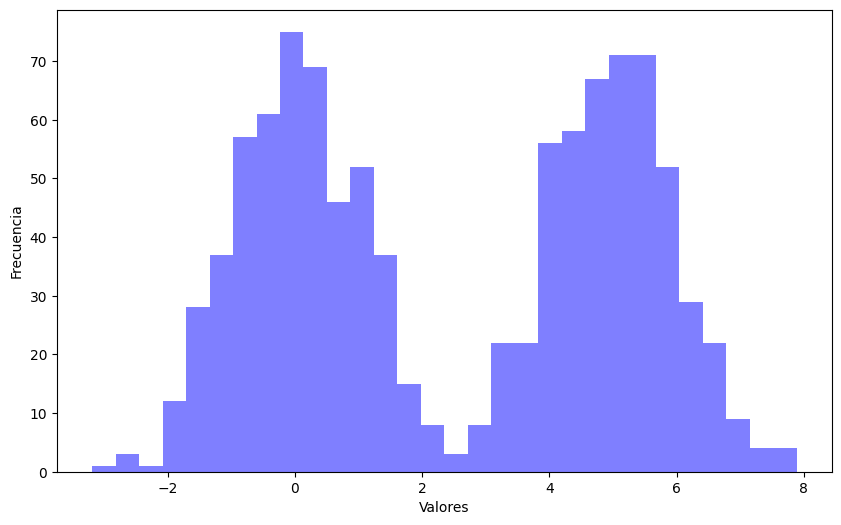

In [4]:
# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, alpha=0.5, color='blue', label='Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

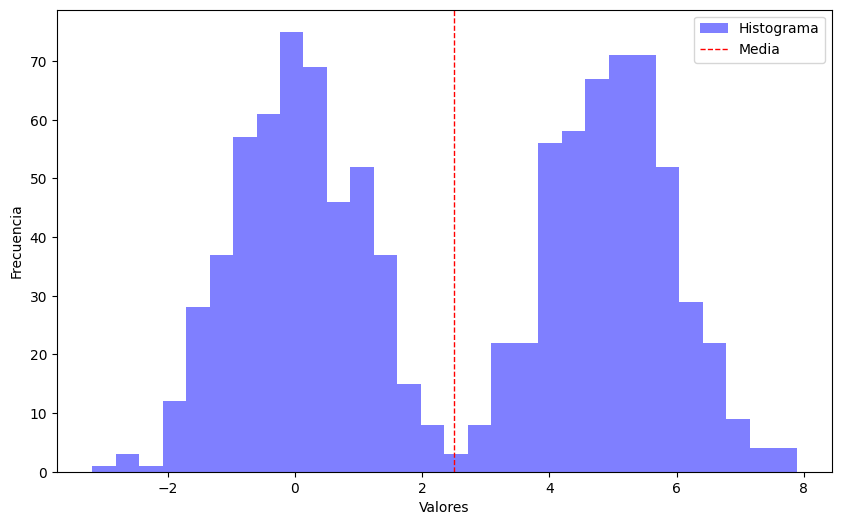

In [5]:
# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, alpha=0.5, color='blue', label='Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Agregamos línea vertical con la media
mean_value = np.mean(X)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Media')
plt.legend()  # Show legend with label for the mean line
plt.show()

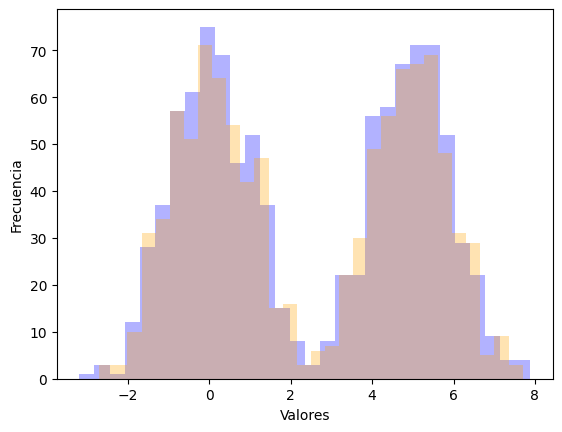

In [6]:
# Definimos un criterio para "cortar" outliers (por ejemplo, a 2 DE de la media)
mean_value = np.mean(X)
std_dev = np.std(X)
lower_bound = mean_value - 2 * std_dev
upper_bound = mean_value + 2 * std_dev

# Filtramos los datos
X_filtered = X[(X >= lower_bound) & (X <= upper_bound)]

# Plot histogram of filtered data
plt.hist(X, bins=30, alpha=0.3, color='blue', label='Histograma')
plt.hist(X_filtered, bins=30, alpha=0.3, color='orange', label='Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

También podemos usar algunas funciones de seaborn para graficar histogramas. Ver documentación [acá](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)


In [8]:
import seaborn as sns

In [9]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


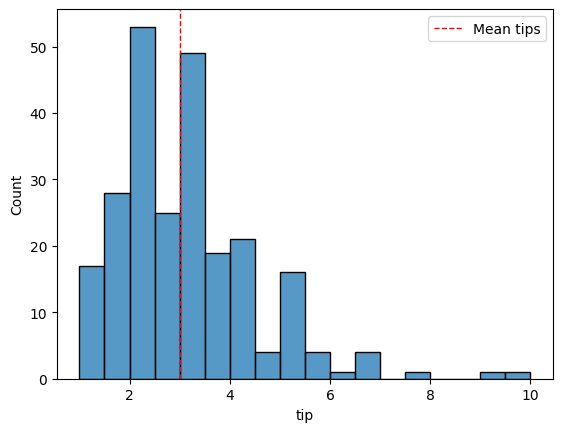

In [10]:
sns.histplot(data=tips['tip'])
mean_tips = np.mean(tips['tip'])
plt.axvline(mean_tips, color='red', linestyle='dashed', linewidth=1, label='Mean tips')
plt.legend()  # Show legend with label for the mean line
plt.show()

<Axes: xlabel='tip', ylabel='Count'>

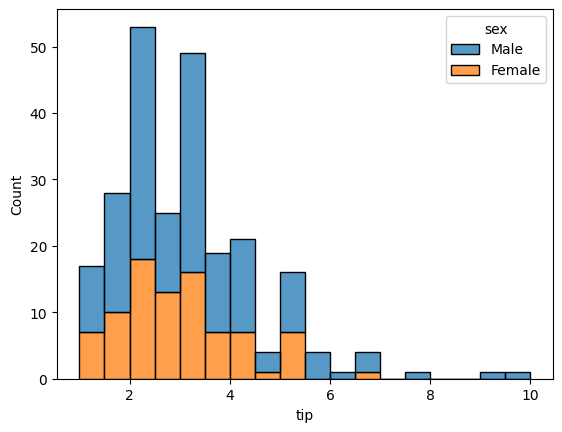

In [13]:
sns.histplot(data=tips, x="tip", hue="sex", multiple="stack")

Podemos sumar la estimación de la densidad usando un Kernel (Gaussiano)

<Axes: xlabel='tip', ylabel='Percent'>

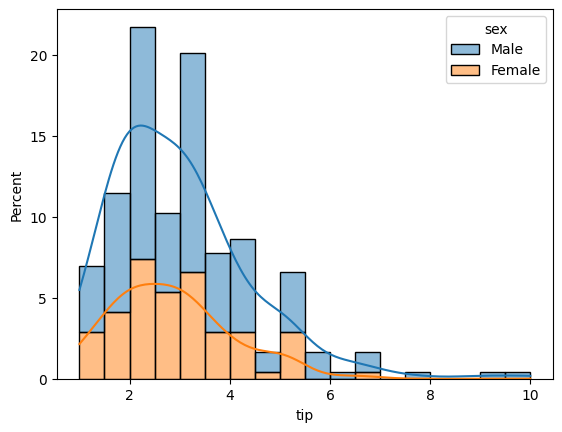

In [14]:
sns.histplot(data=tips, x="tip", hue="sex", stat="percent", multiple="stack",  kde=True)

#### Kernels

Kernel:
A cada observación le estima una pequeña función de densidad y suma todas las pequeñas funciones

$$
𝑓(𝑦_0)= \frac{1}{n} ∑^𝑛_i  \frac{1}{h} 𝐾 \left( \frac{𝑌_𝑖−𝑦_0}{h} \right) 
$$

- 𝐾(𝑧)  función Kernel continua (y generalmente) simétrica 
- ℎ ancho de banda (smoothing bandwidth) --> Controla qué tan “suave” es la densidad 


Vamos a usar el [módulo neighbors de Scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html)

Para estimar una densidad usando kernels tenemos la siguiente función: 

sklearn.neighbors.KernelDensity(*, bandwidth=1.0, algorithm='auto', kernel='gaussian', metric='euclidean', atol=0, rtol=0, breadth_first=True, leaf_size=40, metric_params=None)

donde algunos parámetros importantes son:
- bandwidth (valor por default: 1.0)
- kernel (valor por default: 'gaussian')

Scikit learn nos permite cambiar el kernel y probar varios y cuál ajusta mejor a los datos

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

#### Tipos de kernels (disponibles en Scikit learn)

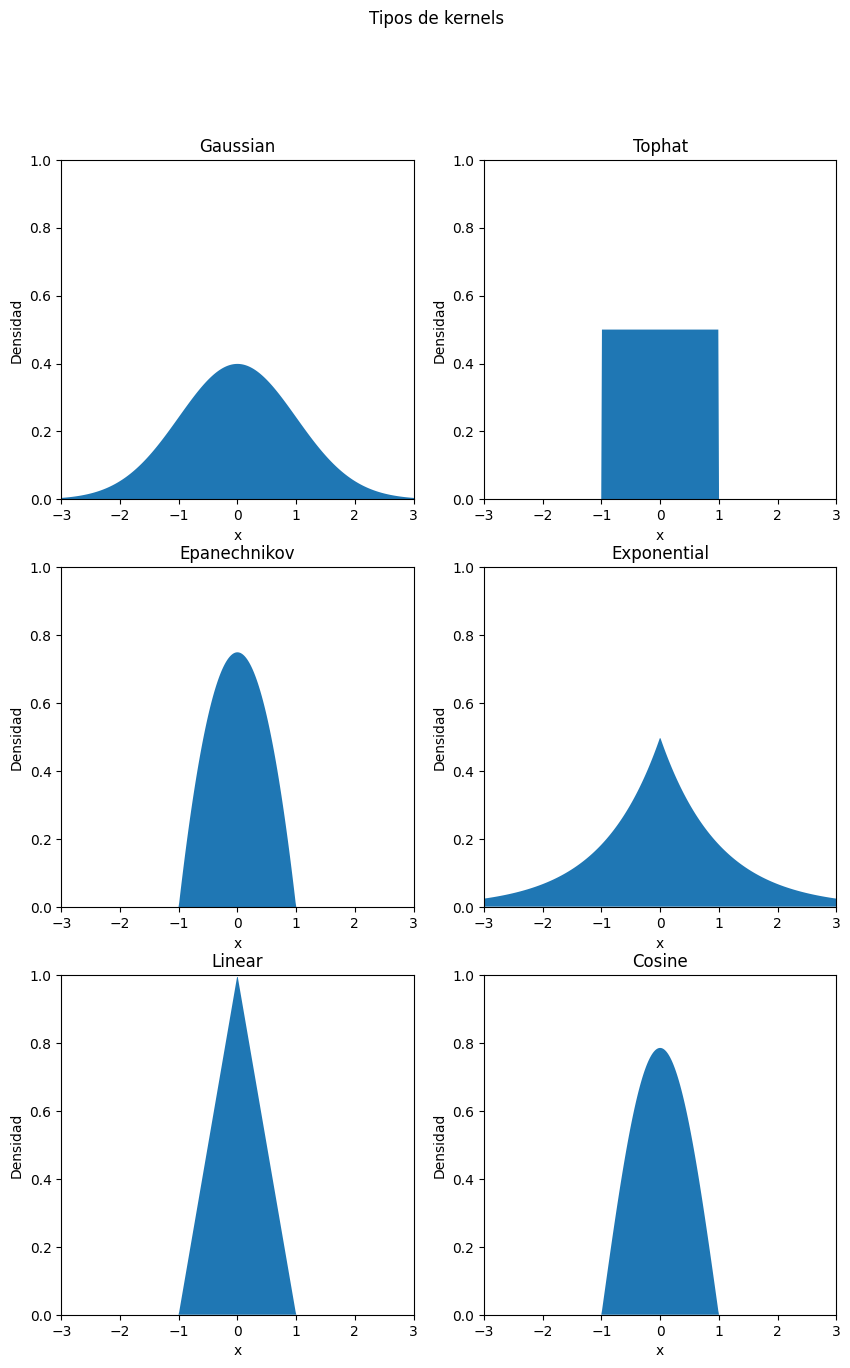

In [16]:
# Kernels
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"] 
  
# Figura con 3 filas y 2 columnas
fig, ax = plt.subplots(3, 2) 
# Tamaño de la figura
fig.set_figheight(15) 
fig.set_figwidth(10)   
# Título 
fig.suptitle("Tipos de kernels") 

# 1D array de valores de x para graficar la distribución 
x_plot = np.linspace(-6, 6, 1000) # 1000 valores de -6 a 6 separados con la misma distancia entre sí
x_plot = x_plot.reshape(-1,1) # formato 2D array (necesario para scikit learn)
x_orig = np.zeros((1, 1)) # punto (0,0)
  
# Graficamos usando los distintos kernels 
for i, kernel in enumerate(kernels): 
    # Ajustamos el modelo 
    kde = KernelDensity(kernel=kernel).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
      
    # Distribuciones 
    ax[i // 2, i % 2].fill(x_plot[:, 0], np.exp(log_dens)) 
    # i//2 nos permite referirnos a la fila del subplot, e i%2 nos permite referirnos a la columna
    # Título y labels de los subplots 
    ax[i // 2, i % 2].set_title(kernel.capitalize()) 
    ax[i // 2, i % 2].set_xlim(-3, 3) 
    ax[i // 2, i % 2].set_ylim(0, 1) 
    ax[i // 2, i % 2].set_ylabel("Densidad") 
    ax[i // 2, i % 2].set_xlabel("x") 
plt.show()

De la misma forma, en un gráfico

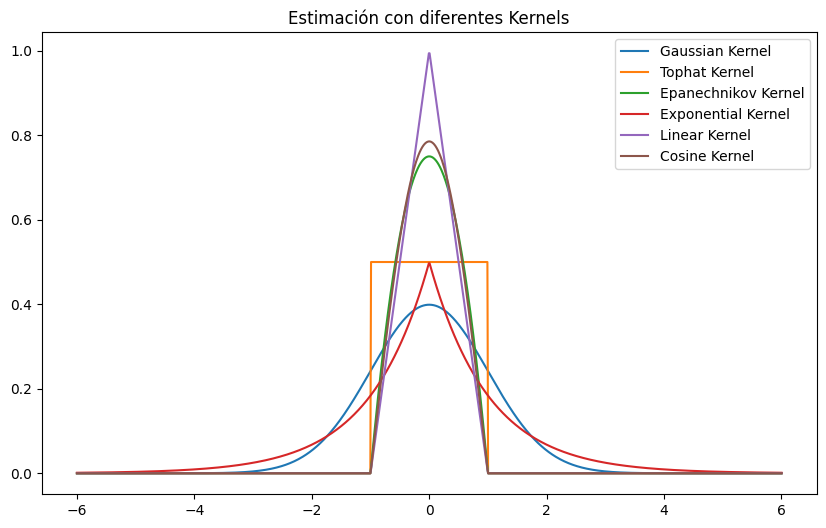

In [17]:
# Kernels 
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"] 
  
# Grafico
plt.figure(figsize=(10,6))

for k in kernels:
    # Ajustamos el modelo 
    kde = KernelDensity(kernel=k).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
    
    # Graficar la estimacion para cada kernel
    plt.plot(x_plot[:,0], np.exp(log_dens), label=f'{k.capitalize()} Kernel')

plt.legend()
plt.title('Estimación con diferentes Kernels')
plt.show()

Ahora veamos qué ocurre si para un mismo kernel, cambiamos los **anchos de banda**

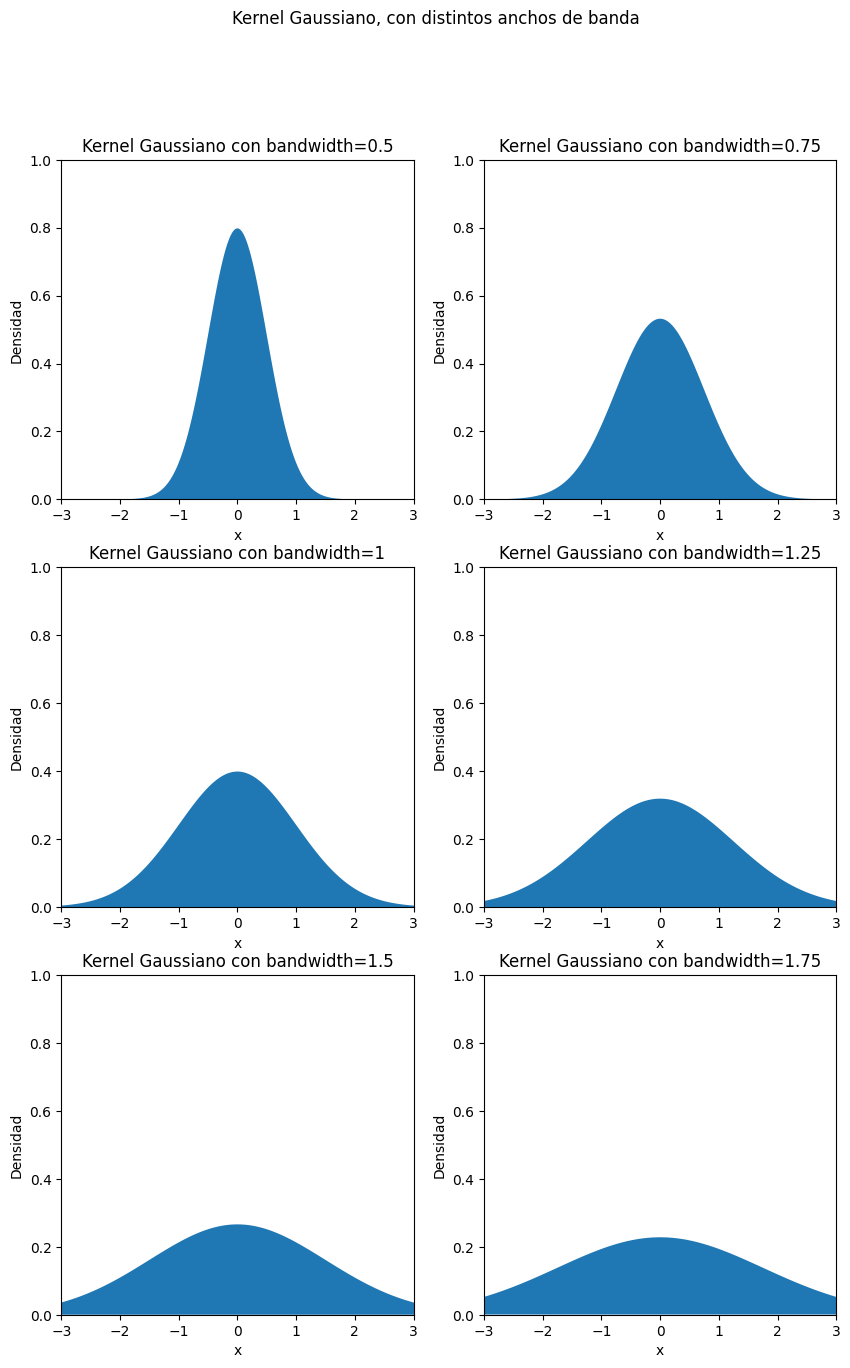

In [18]:
# Anchos de banda
bandwidths = [0.5, 0.75, 1, 1.25, 1.5, 1.75] 
  
# Figura con 3 filas y 2 columnas
fig, ax = plt.subplots(3, 2) 
# Tamaño de la figura
fig.set_figheight(15) 
fig.set_figwidth(10)   
# Título 
fig.suptitle('Kernel Gaussiano, con distintos anchos de banda')

# Graficamos usando los distintos kernels 
for i, bw in enumerate(bandwidths): 
    # Ajustamos el modelo 
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
      
    # Distribuciones 
    ax[i // 2, i % 2].fill(x_plot[:, 0], np.exp(log_dens)) 
    # i//2 nos permite referirnos a la fila del subplot, e i%2 nos permite referirnos a la columna
    # Título y labels de los subplots 
    ax[i // 2, i % 2].set_title('Kernel Gaussiano con bandwidth='+str(bw)) 
    ax[i // 2, i % 2].set_xlim(-3, 3) 
    ax[i // 2, i % 2].set_ylim(0, 1) 
    ax[i // 2, i % 2].set_ylabel('Densidad') 
    ax[i // 2, i % 2].set_xlabel('x') 
plt.show()

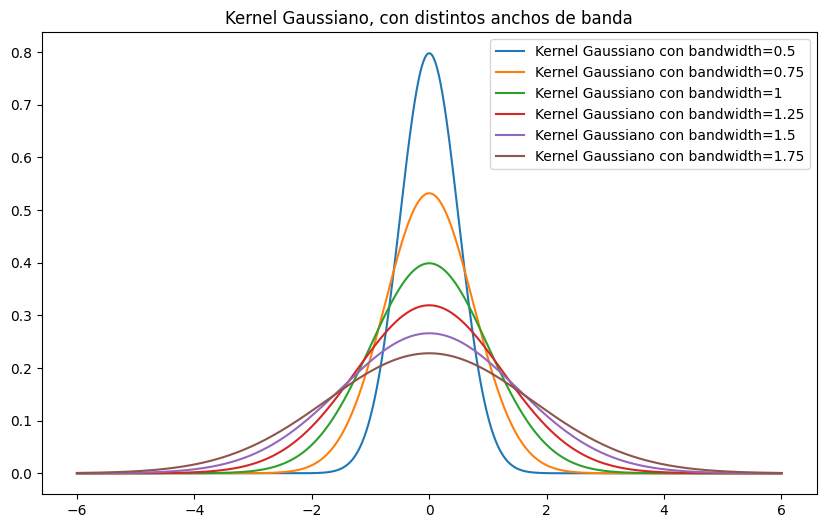

In [20]:
# Anchos de banda
bandwidths = [0.5, 0.75, 1, 1.25, 1.5, 1.75] 
  
# Grafico
plt.figure(figsize=(10,6))

for bw in bandwidths:
    # Ajustamos el modelo 
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
    
    # Graficar la estimacion para cada kernel
    plt.plot(x_plot[:,0], np.exp(log_dens), label='Kernel Gaussiano con bandwidth='+str(bw))

plt.legend()
plt.title('Kernel Gaussiano, con distintos anchos de banda') 
plt.show()

Ahora veamos un ejemplo con datos ficticios

In [19]:
from scipy.stats import norm

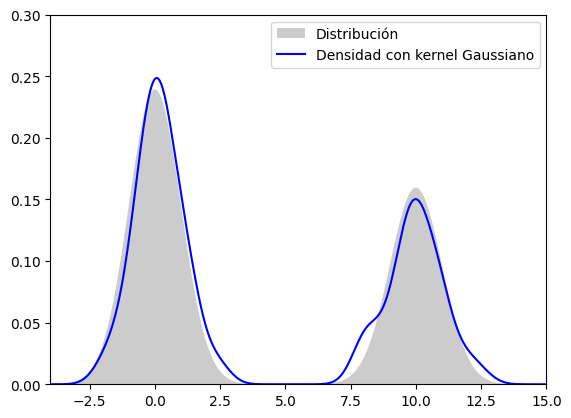

In [21]:
# Creamos una distribución
n = 100
np.random.seed(10)
X = np.concatenate((np.random.normal(0, 1, int(0.6 * n)), np.random.normal(10, 1, int(0.4 * n)))) 
# Creamos X concatenando datos de dos distribuciones normales
# primero 60 datos de una distribución normal con media 0 y desvío 1
# luego, 40 datos de una normal con media 10 y desvío 1
X = X.reshape(-1,1)

X_plot = np.linspace(-5, 15, 1000).reshape(-1,1)
# Usaremos X para estimar la densidad y calcularemos la densidad para los puntos de X_plot 

# Calcular la "verdera" densidad para los puntos X_plot
true_density = 0.6 * norm(0, 1).pdf(X_plot[:, 0]) + 0.4 * norm(10, 1).pdf(X_plot[:, 0]) 
  
# Gráfico
fig, ax = plt.subplots() 
  
# Gráfico de la verdadera densidad 
ax.fill( 
    X_plot[:, 0], true_density,  
    fc='black', alpha=0.2,  
    label='Distribución'
) 
  
# Estimar la densidad de X usando kernel gaussiano y bandwidth de 0.5 
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X) 
# Log de la PDF 
log_dens = kde.score_samples(X_plot) 
  
# Densidad 
ax.plot( 
    X_plot[:, 0], np.exp(log_dens), 
    color='blue', 
    linestyle='-', 
    label='Densidad con kernel Gaussiano'
)  
ax.set_xlim(-4, 15) 
ax.set_ylim(0, 0.3) 
#ax.grid(True) 
ax.legend(loc='upper right') 

plt.show()

Otro ejemplo probando kernels

In [24]:
# Generamos datos
np.random.seed(20)
X = np.concatenate([np.random.normal(0,1,500), np.random.normal(5,1,500)]).reshape(-1,1)
X

# Rango de valores para eje x
X_plot = np.linspace(min(X), max(X), 1000).reshape(-1,1)
#X_plot

Text(0.5, 1.0, 'Estimación con diferentes Kernels')

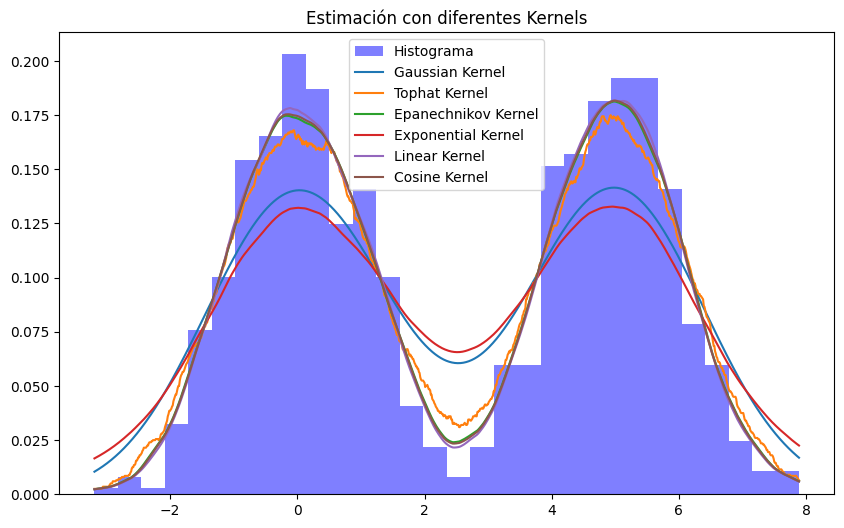

In [25]:
# Lista de kernels a probar
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"] 

# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, density=True, alpha=0.5, color='blue', label='Histograma')

for k in kernels:
    kde = KernelDensity(kernel=k).fit(X)
    
    # Usar la KDE para estimar la densidad para cada valor de X
    log_densities = kde.score_samples(X_plot)
    densities = np.exp(log_densities)
    
    # Graficar para cada kernel
    plt.plot(X_plot[:,0], densities, label=f'{k.capitalize()} Kernel')

plt.legend()
plt.title('Estimación con diferentes Kernels')

Para elegir el bandwidth con CV

In [27]:
from sklearn.model_selection import GridSearchCV

# Grilla de posibles anchos de banda
bandwidths = 10 ** np.linspace(-1, 1, 10)
print(bandwidths)

# Datos con los que se estima KDE
np.random.seed(20)
X = np.concatenate([np.random.normal(0,1,50), np.random.normal(5,1,50)]).reshape(-1,1)
X

grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=5)
grid.fit(X)
grid.best_params_ #mejor ancho de banda (de los posibles dentro de la grilla)

[ 0.1         0.16681005  0.27825594  0.46415888  0.77426368  1.29154967
  2.15443469  3.59381366  5.9948425  10.        ]


{'bandwidth': 0.774263682681127}

### Extra: Métodos no lineales
En el curso nos enfocamos principalmente en modelos lineales, por ser simples y por sus ventajas en términos de interpretabilidad e inferencia

Sin embargo, el supuesto de linealidad es fuerte y a veces puede llevar a un menor poder predictivo. Ahora vamos a relajar el supuesto de linealidad.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import subplots
from ISLP import load_data
#%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
dataset = load_data('Wage')
dataset.info()

In [ ]:
# Vamos a usar salario y edad
X = dataset['age']
y = dataset['wage']
print(y)

In [ ]:
fig, ax = subplots(figsize=(10,6))
ax.scatter(X, y, facecolor='gray', alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Wage')
ax.grid(True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Regresión polinómica

In [ ]:
# Reshape para transformar x en un vector columna
X_train_ = X_train.values.reshape((-1, 1)) # Convertir Series a NumPy array y reshape

# Transformación polinomial
model_pol = PolynomialFeatures(include_bias=True, degree=4)
model_pol.fit(X_train_)
X_train_t = model_pol.transform(X_train_)

# Si en PolynomialFeatures ponemos include_bias=False, podemos agregar constante:
#X_train_t = sm.add_constant(X_train_t)

# Especificamos el modelo y ajustamos
model_pol4 = sm.OLS(y_train, X_train_t)
results = model_pol4.fit()

print(results.summary())


In [ ]:
X_test_t = model_pol.fit_transform(X_test.values.reshape((-1, 1)))

y_pred = results.predict(X_test_t)

print('ECM:', mean_squared_error(y_test, y_pred))

In [ ]:
# Generamos otras X y sus predicciones para graficar
X_seq = np.linspace(X.min(), X.max()).reshape(-1,1)
X_seq_t = model_pol.fit_transform(X_seq)
X_seq_pred = results.predict(X_seq_t)

fig, ax = subplots(figsize=(10,6))
ax.scatter(X, y, facecolor='gray', alpha=0.5)
ax.plot(X_seq, X_seq_pred, label='Reg. polinómica grado 4', linewidth=4)
ax.set_xlabel('Age')
ax.set_ylabel('Wage')
#ax.legend(title='Poly', fontsize=15)
ax.grid(True)


In [ ]:
results.predict(X_seq_t) 

Podemos elegir el grado del polinimio por CV

#### Step function

In [ ]:
# Hacemos a la edad (X) discreta en función de quintiles
cut_X = pd.qcut(X, 4) #qcut con 4 quintiles
cut_X
# Nota pd.cut() permitiría hacer cortes no basados en quintiles

In [ ]:
# y creamos dummies para cada quintil
q_X = pd.get_dummies(cut_X)
q_X

In [ ]:
# Primera columna
q_X.iloc[:, 0]

In [ ]:
q_X_train, q_X_test, y_train, y_test = train_test_split(q_X, y, test_size=0.2, random_state=0)

In [ ]:
q_X_train_= sm.add_constant(q_X_train)

# Especificamos el modelo y ajustamos
q_model_pol4 = sm.OLS(y_train, q_X_train_)
q_results = q_model_pol4.fit()

print(q_results.summary())


In [ ]:
q_pred =  q_results.predict(sm.add_constant(q_X_test)).values

fig, ax = subplots(figsize=(10,6))
ax.scatter(X, y, facecolor='gray', alpha=0.5)
ax.plot(X_seq, results.predict(X_seq_t), label='Reg. polinómica grado 4', linewidth=4)
ax.scatter(X_test.values.reshape(-1,1), q_pred, facecolor='red', alpha=0.9, label="Step function")
ax.set_xlabel('Age')
ax.set_ylabel('Wage')
ax.legend(title='', fontsize=12)
ax.grid(True)



#### Splines
Idea: usar polinomios y step function

Se determinan puntos de corte (knots) en X y se ajustan distintas regresiones para cada segmento.

In [ ]:
print('Min age:', min(dataset['age']), 'Max age:', max(dataset['age']))

In [ ]:
from scipy.interpolate import BSpline

# Definimos knots y grado del polinomio
knots=[18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78]
degree=3
t = [min(dataset['age'])] + knots + [max(dataset['age'])]
spl = BSpline(t, list(dataset['wage']), degree)

# Grilla para evaluar spline
x_smooth = np.linspace(min(dataset['age']), max(dataset['age']), 300)
y_smooth = spl(x_smooth)

# Plot
fig, ax = subplots(figsize=(10,6))
ax.scatter(X, y, facecolor='gray', alpha=0.5)
ax.plot(X_seq, results.predict(X_seq_t), label='Reg. polinómica grado 4', linewidth=4)
ax.plot(x_smooth, y_smooth, label='Spline', linewidth=4)
ax.set_xlabel('Age')
ax.set_ylabel('Wage')
ax.legend(title='', fontsize=12)
ax.grid(True)

#### Regresión Local

Usamos funciones de Statsmodels. [ver](https://www.statsmodels.org/stable/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html#statsmodels.nonparametric.smoothers_lowess.lowess)

In [ ]:
import statsmodels as sm

X = dataset['age']
y = dataset['wage']
age_grid = np.linspace(X.min(), X.max(), 100)


lowess = sm.nonparametric.smoothers_lowess.lowess

spans = [0.1, 0.6]
# spans de 0.1 and 0.6. Se consideran 10% o 60% de las observaciones vecinas

# Plot
fig, ax = subplots(figsize=(10,6))
ax.scatter(X, y, facecolor='gray', alpha=0.5)
ax.plot(X_seq, results.predict(X_seq_t), label='Reg. polinómica grado 4', linewidth=4)
for span in spans:
    fitted = lowess(y, X, frac=span, xvals=age_grid)
    ax.plot(age_grid, fitted, label='Reg. local {:.1f}'.format(span), linewidth=4)
ax.set_xlabel('Age')
ax.set_ylabel('Wage')
ax.legend(title='', fontsize=12)
ax.grid(True)

# Con span de 0.6 es más suave
